In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from numpy import random

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("/tmp/data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

In [3]:
w = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

act = tf.nn.softmax(tf.matmul(x, w) + b)

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=act, labels=y))

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [4]:
pred = tf.equal(tf.argmax(act, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(pred, tf.float32))

In [5]:
x_train = mnist.train.images
y_train = mnist.train.labels
x_test = mnist.test.images
y_test = mnist.test.labels

In [6]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

loss_list = []
acc_list = []

for i in range(50) :
    batch_x, batch_y = mnist.train.next_batch(100)
    err, train, acc = sess.run([cross_entropy, train_step, accuracy], feed_dict={x:batch_x, y:batch_y})

    loss_list.append(1-acc)
    acc_list.append(acc)

In [12]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 64
data = len(x_train)

loss_list2 = []
acc_list2 = []

for i in range(50) :
    combine = list(zip(x_train, y_train))
    np.random.shuffle(combine)

    x_train[:], y_train[:] = zip(*combine)

    combine = list(zip(x_test, y_test))
    np.random.shuffle(combine)

    x_test[:], y_test[:] = zip(*combine)
    
    for i in range(batch_size, data, batch_size):
        batch_x = x_train[i-batch_size:i]
        batch_y = y_train[i-batch_size:i]
        sess.run(train_step, feed_dict={x:batch_x, y:batch_y})
        
        err, train, acc = sess.run([cross_entropy, train_step, accuracy], feed_dict={x:batch_x, y:batch_y})

        loss_list2.append(1-acc)
        acc_list2.append(acc)

Text(0, 0.5, 'loss')

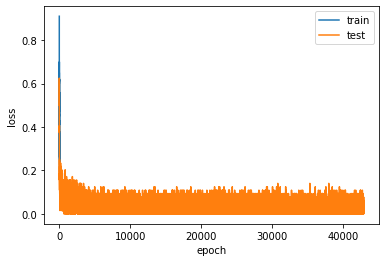

In [13]:
plt.plot(loss_list, label='train')
plt.plot(loss_list2, label='test')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'acc')

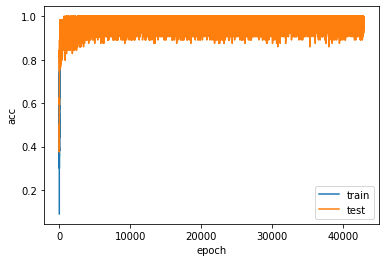

In [14]:
plt.plot(acc_list, label='train')
plt.plot(acc_list2, label='test')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('acc')

In [15]:
w1 = tf.Variable(tf.zeros([784, 256]))
w2 = tf.Variable(tf.zeros([256, 256]))
w3 = tf.Variable(tf.zeros([256, 10]))

b1 = tf.Variable(tf.zeros([256]))
b2 = tf.Variable(tf.zeros([256]))
b3 = tf.Variable(tf.zeros([10]))

l1= tf.nn.softmax(tf.matmul(x, w1) + b1)
l2 = tf.nn.softmax(tf.matmul(l1, w2) + b2)
act2 = tf.matmul(l2, w3) + b3

In [16]:
x_train = mnist.train.images
y_train = mnist.train.labels
x_test = mnist.test.images
y_test = mnist.test.labels

In [17]:
cross_entropy2 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=act2, labels=y))
train_step2 = tf.train.AdamOptimizer(1e-3).minimize(cross_entropy)

In [18]:
pred2 = tf.equal(tf.argmax(act2, 1), tf.argmax(y, 1))
accuracy2 = tf.reduce_mean(tf.cast(pred2, tf.float32))

In [22]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

loss_list = []
acc_list = []

for i in range(50) :
    batch_x, batch_y = mnist.train.next_batch(100)
    err, train, acc = sess.run([cross_entropy, train_step, accuracy], feed_dict={x:batch_x, y:batch_y})

    loss_list.append(1-acc)
    acc_list.append(acc)

In [23]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 64
data = len(x_train)

loss_list2 = []
acc_list2 = []

for i in range(50) :
    combine = list(zip(x_train, y_train))
    np.random.shuffle(combine)

    x_train[:], y_train[:] = zip(*combine)

    combine = list(zip(x_test, y_test))
    np.random.shuffle(combine)

    x_test[:], y_test[:] = zip(*combine)
    
    for i in range(batch_size, data, batch_size):
        batch_x = x_train[i-batch_size:i]
        batch_y = y_train[i-batch_size:i]
        sess.run(train_step, feed_dict={x:batch_x, y:batch_y})
        
        err2, train2, acc2 = sess.run([cross_entropy, train_step, accuracy], feed_dict={x:batch_x, y:batch_y})

        loss_list2.append(1-acc2)
        acc_list2.append(acc2)

Text(0, 0.5, 'loss')

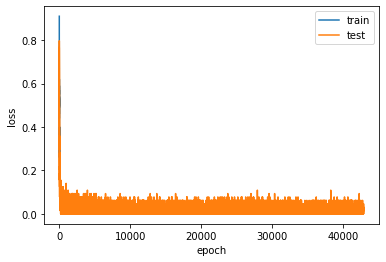

In [24]:
plt.plot(loss_list, label='train')
plt.plot(loss_list2, label='test')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')